## Imports ##

In [2]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import pandas as pd

## Functions ##

In [3]:
def prepare_data(name, generations, populationSize, extension, location):
    path = location + name + "_" + str(generations) + "_" + str(populationSize) + extension
    best_path = location + name + "_Best_" + str(generations) + "_" + str(populationSize) + extension
    results = pd.read_csv(path)
    resultsBest = pd.read_csv(best_path)

    generations_number = max(results['Generation'])
    generations_number_best = max(resultsBest['Generation'])
    
    grouper = results.groupby(['Generation'])
    grouperBest = resultsBest.groupby(['Generation'])
    grouper.get_group(2)
    grouperBest.get_group(2)
    
    return grouper, grouperBest, generations_number, generations_number_best, resultsBest

def prepare_axes(minimum, maximum, depth):
    x = arange(minimum, maximum, depth)
    y = arange(minimum, maximum, depth)

    X, Y = meshgrid(x, y)
    return X, Y
    
def rastrigin_function(X, Y):
    Z = (X**2 - 10 * np.cos(2 * 3.14 * X)) + (Y**2 - 10 * np.cos(2 * 3.14 * Y)) + 20
    return (Z[:-1, :-1])

def update(i):
    fig.clear()
    plt.title('Generation=%d' % i)
    plt.pcolormesh(X, Y, Z, cmap=cmap)
    
    X_result = np.asarray(grouper.get_group(i+1)['X'])
    Y_result = np.asarray(grouper.get_group(i+1)['Y'])
    
    X_result_best = np.asarray(grouperBest.get_group(i+1)['X'])
    Y_result_best = np.asarray(grouperBest.get_group(i+1)['Y'])
    Cost_result_best = np.asarray(grouperBest.get_group(i+1)['Cost'])

    for j in range(len(X_result)):
        if X_result[j] < maximum and X_result[j] > minimum and Y_result[j] < maximum and Y_result[j] > minimum:
            point = plt.plot(X_result[j], Y_result[j], 'ro')
    
    for a in range(len(X_result_best)):
        if X_result_best[a] < maximum and X_result_best[a] > minimum and Y_result_best[a] < maximum and Y_result_best[a] > minimum:
            pointBest = plt.plot(X_result_best[a], Y_result_best[a], 'bo')

def plot_score(name, generations, populationSize, extension, location):
    grouper, grouperBest, generations_number, generations_number_best, resultsBest = prepare_data(name, generations, populationSize, extension, location)
    s = resultsBest['Cost']
    t = np.arange(0.0, s.size)

    fig, ax = plt.subplots(figsize=(10,7))

    ax.plot(t, s)
    title = name + " Algorithm - Generations: " + str(generations) + " Population: " + str(population_size)
    ax.set(xlabel='Generations', ylabel='Bes tScore', title = title)
    ax.grid()
    plt.show()

## Parameters ##

In [7]:
location = "C:/swarm-inteligence/"
extension = ".csv"
name = "Firefly"
generations = 100
population_size = 30

minimum = -6.0
maximum = 6.0
depth = 0.25

## Execution Code ##

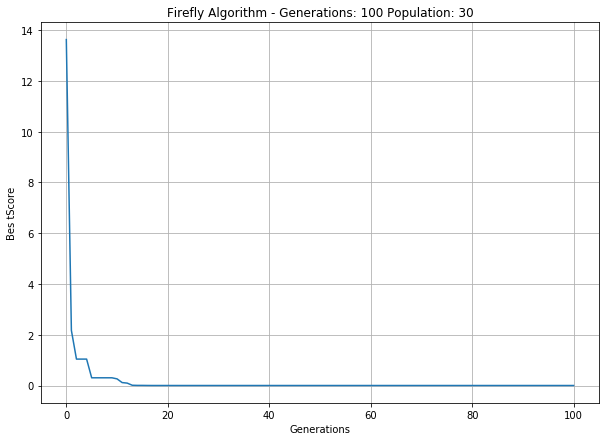

In [8]:
plot_score(name, generations, population_size, extension, location)

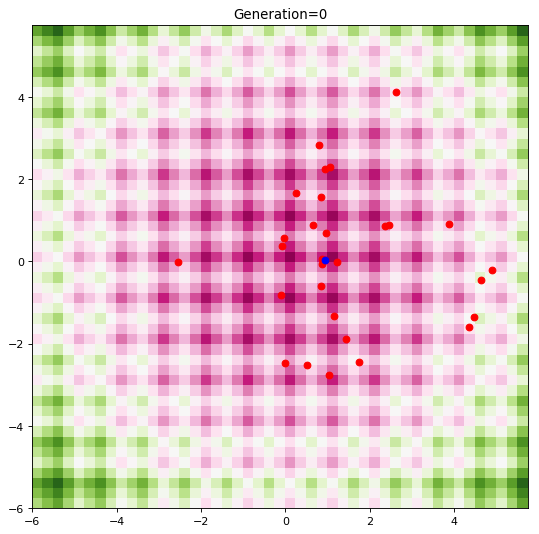

In [9]:
grouper, grouperBest, generations_number, generations_number_best, resultsBest = prepare_data(name, generations, population_size, extension, location )
X, Y = prepare_axes(minimum, maximum, depth)
Z = rastrigin_function(X, Y)

cmap = plt.get_cmap('PiYG')
fig = plt.figure(figsize=(8, 8), dpi=80)
plt.pcolormesh(X, Y, Z, cmap=cmap)
plt.title('Generation=%d' % 0)

anim = animation.FuncAnimation(fig, update, frames= generations_number, interval = 100, repeat = True)
    
HTML(anim.to_jshtml())               